In [1]:
import sys
import os
src_path = os.path.abspath(os.path.join(os.getcwd(), '..', 'src'))
if src_path not in sys.path:
    sys.path.append(src_path)

import config as cf
rl = lambda x: x.replace('\\', '/')
print(f'VITABSET_TRAIN_IMAGE_ROOT = "{rl(cf.VITABSET_TRAIN_IMAGE_ROOT)}"')
print(f'VITABSET_TRAIN_JSON = "{rl(cf.VITABSET_TRAIN_JSON)}"')
print(f'VITABSET_VAL_IMAGE_ROOT = "{rl(cf.VITABSET_VAL_IMAGE_ROOT)}"')
print(f'VITABSET_VAL_JSON = "{rl(cf.VITABSET_VAL_JSON)}"')
print(f'VITABSET_TEST_IMAGE_ROOT = "{rl(cf.VITABSET_TEST_IMAGE_ROOT)}"')
print(f'VITABSET_TEST_JSON = "{rl(cf.VITABSET_TEST_JSON)}"')
print(f'STRUCTURE_VOCAB_FILE = "{rl(cf.STRUCTURE_VOCAB_FILE)}"')

VITABSET_TRAIN_IMAGE_ROOT = "F:/data/vitabset/train"
VITABSET_TRAIN_JSON = "F:/data/vitabset/train.bz2"
VITABSET_VAL_IMAGE_ROOT = "F:/data/vitabset/val"
VITABSET_VAL_JSON = "F:/data/vitabset/val.bz2"
VITABSET_TEST_IMAGE_ROOT = "F:/data/vitabset/test"
VITABSET_TEST_JSON = "F:/data/vitabset/test.bz2"
STRUCTURE_VOCAB_FILE = "d:/BIG Projects/Python/ETV/src/data/structure_vocab.txt"


In [2]:
from mmengine.config import Config

# Load config
cfg = Config.fromfile('../src/configs/etv_concat_resnetex_ranger.py')
print(cfg.pretty_text)

PAD = 97
STRUCTURE_VOCAB_FILE = 'd:/BIG Projects/Python/ETV/src/data/structure_vocab.txt'
VITABSET_TEST_IMAGE_ROOT = 'F:/data/vitabset/test'
VITABSET_TEST_JSON = 'F:/data/vitabset/test.bz2'
VITABSET_TRAIN_IMAGE_ROOT = 'F:/data/vitabset/train'
VITABSET_TRAIN_JSON = 'F:/data/vitabset/train.bz2'
VITABSET_VAL_IMAGE_ROOT = 'F:/data/vitabset/val'
VITABSET_VAL_JSON = 'F:/data/vitabset/val.bz2'
alphabet_len = 94
custom_imports = dict(
    allow_failed_imports=False,
    imports=[
        'models.backbones.resnet_extra',
        'models.decoders.table_master_concat_decoder',
        'models.dictionaries.table_master_dictionary',
        'models.losses.master_tf_loss',
        'models.metrics.teds_metric',
        'models.postprocessors.table_master_postprocessor',
        'datasets.table_dataset',
        'datasets.transforms.table_resize',
        'datasets.transforms.table_pad',
        'datasets.transforms.pack_inputs',
        'optimizer.ranger',
    ])
data_pipeline = [
    dict(type='Load

In [3]:
from models.backbones.resnet_extra import ResNetExtra
from models.decoders.table_master_concat_decoder import TableMasterConcatDecoder
from models.dictionaries.table_master_dictionary import TableMasterDictionary
from models.losses.master_tf_loss import MASTERTFLoss
from models.metrics.teds_metric import TEDSMetric
from models.postprocessors.table_master_postprocessor import TableMasterPostprocessor
from datasets.table_dataset import PubTabNetDataset
from datasets.transforms.table_resize import TableResize
from datasets.transforms.table_pad import TablePad
from datasets.transforms.pack_inputs import PackInputs
from optimizer.ranger import Ranger
from mmocr.utils import register_all_modules
register_all_modules()

In [4]:
from mmocr.registry import DATASETS
dataset_config = cfg.train_dataloader.dataset.copy()
dataset_pipeline = dataset_config['pipeline']
dataset_config['pipeline'] = []
dataset_config['max_data'] = 100
# Build dataset
dataset = DATASETS.build(dataset_config)

In [5]:

# Kiểm tra 1 sample đầu tiên
sample = dataset[1]
print(sample)


{'img_path': 'F:/data/vitabset/train\\143530.png', 'sample_idx': 1, 'instances': [{'tokens': ['<thead>', '<tr>', '<td>', '</td>', '<td>', '</td>', '<td>', '</td>', '<td>', '</td>', '</tr>', '</thead>', '<tbody>', '<tr>', '<td>', '</td>', '<td>', '</td>', '<td>', '</td>', '<td>', '</td>', '</tr>', '<tr>', '<td>', '</td>', '<td>', '</td>', '<td>', '</td>', '<td>', '</td>', '</tr>', '<tr>', '<td>', '</td>', '<td>', '</td>', '<td>', '</td>', '<td>', '</td>', '</tr>', '<tr>', '<td>', '</td>', '<td>', '</td>', '<td>', '</td>', '<td>', '</td>', '</tr>', '</tbody>'], 'task_type': 'structure'}], 'img_info': {'height': None, 'width': None, 'split': 'train'}}


In [6]:
import random
from mmengine.dataset import Compose
pipeline = Compose(dataset_pipeline)
print(dataset_pipeline)

[{'type': 'LoadImageFromFile'}, {'type': 'TableResize', 'keep_ratio': True, 'long_size': 480}, {'type': 'TablePad', 'size': (480, 480), 'pad_val': 0}, {'type': 'PackInputs', 'keys': ['img'], 'mean': [0.5, 0.5, 0.5], 'std': [0.5, 0.5, 0.5], 'meta_keys': ('filename', 'ori_shape', 'img_shape', 'scale_factor', 'img_norm_cfg', 'ori_filename', 'pad_shape')}]



=== Step 1: LoadImageFromFile ===
Transform: LoadImageFromFile(ignore_empty=False, min_size=0, to_float32=False, color_type='color', imdecode_backend='cv2', backend_args=None)
Before: ['img_path', 'sample_idx', 'instances', 'img_info']
After: ['img_path', 'sample_idx', 'instances', 'img_info', 'img', 'img_shape', 'ori_shape']
Image shape: (550, 357, 3)


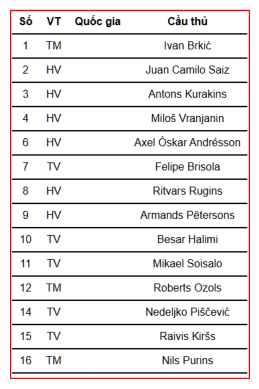


=== Step 2: TableResize ===
Transform: TableResize(min_size=None, long_size=480)
Before: ['img_path', 'sample_idx', 'instances', 'img_info', 'img', 'img_shape', 'ori_shape']
After: ['img_path', 'sample_idx', 'instances', 'img_info', 'img', 'img_shape', 'ori_shape', 'scale', 'scale_factor', 'keep_ratio']
Image shape: (479, 311, 3)


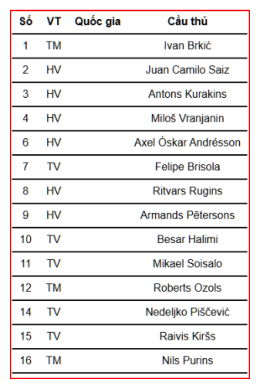


=== Step 3: TablePad ===
Transform: TablePad(size=(480, 480), size_divisor=None, pad_val={'img': 0, 'seg': 255}, pad_to_square=False, padding_mode='constant', return_mask=False, mask_ratio=1)
Before: ['img_path', 'sample_idx', 'instances', 'img_info', 'img', 'img_shape', 'ori_shape', 'scale', 'scale_factor', 'keep_ratio']
After: ['img_path', 'sample_idx', 'instances', 'img_info', 'img', 'img_shape', 'ori_shape', 'scale', 'scale_factor', 'keep_ratio', 'pad_shape', 'pad_fixed_size', 'pad_size_divisor']
Image shape: (480, 480, 3)


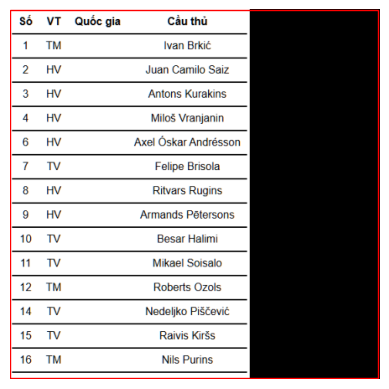


=== Step 4: PackInputs ===
Transform: PackInputs(keys=['img'], meta_keys=('filename', 'ori_shape', 'img_shape', 'scale_factor', 'img_norm_cfg', 'ori_filename', 'pad_shape'), mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
Before: ['img_path', 'sample_idx', 'instances', 'img_info', 'img', 'img_shape', 'ori_shape', 'scale', 'scale_factor', 'keep_ratio', 'pad_shape', 'pad_fixed_size', 'pad_size_divisor']
After: ['img_norm_cfg', 'inputs', 'data_samples']


In [7]:


sample = dataset[random.randint(0, len(dataset) - 1)].copy()
for i, transform in enumerate(pipeline.transforms):
    print(f"\n=== Step {i+1}: {transform.__class__.__name__} ===")
    print(f"Transform: {transform}")
    print(f"Before: {list(sample.keys())}")
    
    sample = transform(sample)
    
    print(f"After: {list(sample.keys())}")
    # print_dict(sample, indent=2)
    
    # Hiển thị thông tin chi tiết
    if 'img' in sample:
        print(f"Image shape: {sample['img'].shape}")
        import matplotlib.pyplot as plt

        plt.imshow(sample['img'])
        import matplotlib.patches as patches
        ax = plt.gca()
        rect = patches.Rectangle((0, 0), sample['img'].shape[1]-2, sample['img'].shape[0]-2, linewidth=1, edgecolor='red', facecolor='none')
        ax.add_patch(rect)

        if 'mask' in sample:
            print(f"Mask shape: {sample['mask'].shape}")

        plt.axis('off')
        plt.show()
    

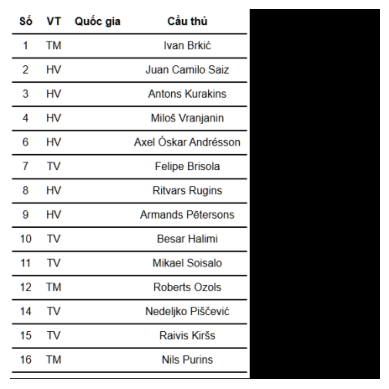

In [ ]:
import torch
import matplotlib.pyplot as plt
import numpy as np

def show_normalized_img(img, mean, std):
    """Hiển thị ảnh đã normalize"""
    if isinstance(img, torch.Tensor):
        img = img.cpu().numpy()
    
    if len(img.shape) == 4:
        img = img[0]
    
    # Denormalize: (img * std) + mean
    # Reshape mean và std để match với image shape (C,H,W)
    mean = np.array(mean).reshape(3, 1, 1)
    std = np.array(std).reshape(3, 1, 1)
    denorm = (img * std) + mean
    denorm = (denorm - denorm.min()) / (denorm.max() - denorm.min()) # Chuẩn hóa lại về khoảng [0, 1]
    
    # Chuyển từ (C,H,W) sang (H,W,C) để hiển thị
    denorm = np.transpose(denorm, (1, 2, 0))
    
    plt.imshow(denorm)
    plt.axis('off')
    plt.show()

mean = sample['img_norm_cfg']['mean']
std = sample['img_norm_cfg']['std']
img, instances = sample['inputs'], sample['data_samples']
show_normalized_img(img, mean, std)